This file is for the Kaggle competition "Predict CO2 Emissions in Rwanda" The due date is Aug 21, 2023 for official competition.

Source of the Kaggle Comp is: https://www.kaggle.com/competitions/playground-series-s3e20/data

Goal: Predict CO2 emissions from 2022 to 2022 Nov

In [1]:
import pandas as pd
import zipfile
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [2]:
zf = zipfile.ZipFile("Data/playground-series-s3e20.zip")

In [7]:
zf.namelist()

['sample_submission.csv', 'test.csv', 'train.csv']

In [27]:
df_train = pd.read_csv(zf.open("train.csv"))
df_test = pd.read_csv(zf.open("test.csv"))

In [29]:
df_train.sample(5)
df_train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [39]:
df_train.sample(5)


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
11497,ID_-1.070_29.330_2019_49,-1.070,29.330,2019,49,0.000119,0.784588,0.000102,0.112230,74.159143,...,4976.568651,63747.075865,3976.568698,42.245153,0.315727,3.408160,44.659530,-140.086976,30.597671,35.321564
49855,ID_-2.179_29.121_2020_35,-2.179,29.121,2020,35,0.000411,0.640591,0.000265,0.170129,-29.861499,...,6994.772478,51855.009991,5994.772450,3.971704,0.100767,39.941294,42.961065,-63.218505,23.387039,4.647865
27692,ID_-1.528_29.972_2019_26,-1.528,29.972,2019,26,0.000092,0.853260,0.000071,0.133250,5.322925,...,3201.364209,77474.150000,2293.350098,8.064050,0.316043,6.219113,30.394110,-40.174009,33.575719,104.644775
69969,ID_-2.834_30.466_2019_09,-2.834,30.466,2019,9,-0.000144,0.793048,-0.000141,0.214952,-30.154840,...,5246.678956,54500.349998,4502.269245,17.613153,0.270848,-25.557908,40.624738,-99.702953,20.142284,39.104156
45592,ID_-2.055_30.845_2021_12,-2.055,30.845,2021,12,0.000297,0.627827,0.000186,0.170984,38.641393,...,8015.171802,44221.082958,7043.829249,5.814404,0.245460,35.406278,39.613856,-76.457158,18.435265,10.267194


<Axes: xlabel='longitude', ylabel='latitude'>

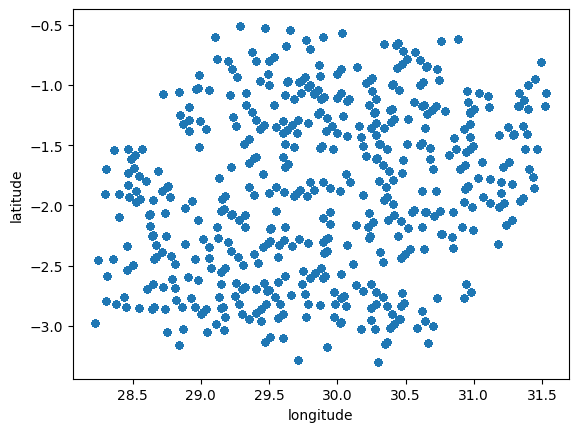

In [40]:
df_train.plot(x="longitude", y ="latitude", kind ="scatter" )

In [44]:
df_train.dtypes

ID_LAT_LON_YEAR_WEEK           object
latitude                      float64
longitude                     float64
year                            int64
week_no                         int64
                               ...   
Cloud_sensor_azimuth_angle    float64
Cloud_sensor_zenith_angle     float64
Cloud_solar_azimuth_angle     float64
Cloud_solar_zenith_angle      float64
emission                      float64
Length: 76, dtype: object

<Axes: xlabel='week_no'>

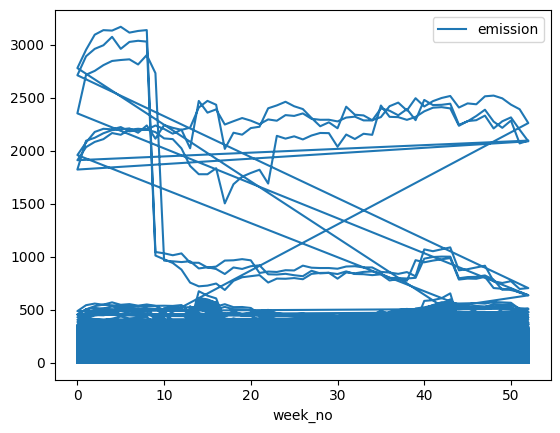

In [46]:
df_train.plot(x="week_no", y ="emission", kind = 'line')